<a href="https://colab.research.google.com/github/emicervantes/wound_classification/blob/main/wound_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

#### Load wound data

In [3]:
X = np.load('wound_features.npy', encoding = 'bytes')
Y = np.load('wound_label.npy', encoding = 'bytes')

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)
print(x_train.shape, y_train.shape)

(516, 50, 50, 3) (516,)


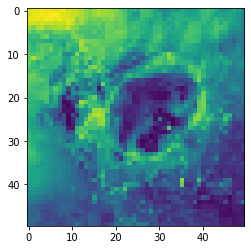

In [5]:
plt.imshow(x_train[3,:,:,0])

In [6]:
len(np.unique(Y))

6

#### CNN Using Keras

In [7]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("tanh"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

model.fit(X, Y, batch_size = 32, epochs = 10, validation_split = 0.1)



Epoch 1/10
21/21 [==============================] - 5s 202ms/step - loss: 0.0000e+00 - accuracy: 0.2018 - val_loss: 0.0000e+00 - val_accuracy: 0.2297
Epoch 2/10
21/21 [==============================] - 4s 189ms/step - loss: 0.0000e+00 - accuracy: 0.2063 - val_loss: 0.0000e+00 - val_accuracy: 0.2297
Epoch 3/10
21/21 [==============================] - 4s 188ms/step - loss: 0.0000e+00 - accuracy: 0.2093 - val_loss: 0.0000e+00 - val_accuracy: 0.2297
Epoch 4/10
21/21 [==============================] - 4s 187ms/step - loss: 0.0000e+00 - accuracy: 0.2108 - val_loss: 0.0000e+00 - val_accuracy: 0.2297
Epoch 5/10
21/21 [==============================] - 4s 192ms/step - loss: 0.0000e+00 - accuracy: 0.2364 - val_loss: 0.0000e+00 - val_accuracy: 0.2297
Epoch 6/10
21/21 [==============================] - 4s 189ms/step - loss: 0.0000e+00 - accuracy: 0.2425 - val_loss: 0.0000e+00 - val_accuracy: 0.2973
Epoch 7/10
21/21 [==============================] - 4s 187ms/step - loss: 0.0000e+00 - accuracy: 0.2

### Changing first Activation method while holding the first and second Activation and other stuff the same
  - Original Activation method was 'ReLU' which gave an accuracy value of 0.2319 at Epoch 10/10 

  - Original Activation method was 'tanh' which gave an accuracy value of 0.2364 at Epoch 10/10 

  - Original Activation method was 'elu' which gave an accuracy value of 0.2319 at Epoch 10/10 

  - Original Activation method was 'sigmoid' which gave an accuracy value of 0.2312 at Epoch 10/10  

  - Reference: https://towardsdatascience.com/7-popular-activation-functions-you-should-know-in-deep-learning-and-how-to-use-them-with-keras-and-27b4d838dfe6

### Changing second Activation method while holding the first and third Activation and other stuff the same
  - Original Activation method was 'ReLU' which gave an accuracy value of 0.2319 at Epoch 10/10 

  - Original Activation method was 'tanh' which gave an accuracy value of >0.3 (0.31 and 0.3358) at Epoch 10/10 (this should be used as the second activation method)

  - Original Activation method was 'elu' which gave an accuracy value of 0.2319 at Epoch 10/10 

  - Original Activation method was 'sigmoid' which gave an accuracy value of 0.2922 at Epoch 10/10 (best was 0.3027 at Epoch 9/10) 

  - Reference: https://towardsdatascience.com/7-popular-activation-functions-you-should-know-in-deep-learning-and-how-to-use-them-with-keras-and-27b4d838dfe6

### Key Thing to Improve Accuracy is the Validation_Split value
  - As you Increase the value, the accuracy will improve, but then the training data will be smaller 

### CNN Using Torch

In [8]:
# Check GPU avialbility
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [9]:
# Hyper parameters
num_epochs = 5
num_classes = 6
batch_size = 100
learning_rate = 0.0001

In [10]:
torch_XTr = torch.tensor(x_train)
torch_YTr = torch.tensor(y_train)
torch_XTe = torch.tensor(x_test)
torch_YTe = torch.tensor(y_test)

train = torch.utils.data.TensorDataset(torch_XTr, torch_YTr)
train_loader = torch.utils.data.DataLoader(train, batch_size= batch_size, shuffle = True)

test = torch.utils.data.TensorDataset(torch_XTe, torch_YTe)
test_loader = torch.utils.data.DataLoader(test, batch_size= batch_size, shuffle = False)



In [11]:
Xfe, Yla = next(iter(train_loader))
print(Xfe.shape, Yla.shape)


torch.Size([100, 50, 50, 3]) torch.Size([100])


In [ ]:
#Xfe = torch.swapaxes(Xfe, 1,3)
#Xfe.shape

In [ ]:
#plt.imshow(Xfe[100,0,:,:])

In [12]:
# CNN
class ConvNet(nn.Module):
  def __init__(self, num_classes = 6):
    super(ConvNet, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(3, 16, kernel_size = 5, stride = 1, padding = 2),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(16, 32, kernel_size = 5, stride = 1, padding = 2),
        nn.BatchNorm2d(32),
        nn.Tanh(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)  
    )
    self.fc = nn.Linear(4608, num_classes)

  def forward(self, Xfe):
    Xfe = torch.swapaxes(Xfe, 1,3)
    out = self.layer1(Xfe.float())    
    out = self.layer2(out)   
    out = out.reshape(out.size(0), -1)
    out = self.fc(out)
    return out

In [13]:
model = ConvNet(num_classes).to(device)
output = model(Xfe)

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
print(model)
#test run to check loss
loss = criterion(output,Yla)
print(loss)

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Tanh()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=4608, out_features=6, bias=True)
)
tensor(1.8204, grad_fn=<NllLossBackward0>)


Training Model

In [17]:
# Train the model
total_step = len(train_loader)
num_epochs = 10
running_loss = 0
count = 0
for epoch in range(num_epochs):    
    for i, (Xfe, Yla) in enumerate(train_loader):
        Xfe = Xfe.to(device)
        Yla = Yla.to(device)

        # Forward pass       
        outputs = model(Xfe)   

        # Calculate Loss     
        loss = criterion(outputs, Yla)

        # Backward and optimize   
        optimizer.zero_grad()     
        loss.backward()
        optimizer.step()

        count += 1

        #store loss and iteration
        
        if count % 6 == 0:
            #print('Iteration: {} Loss: {} '.format(count, loss.item()))
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

        #Total Iterations (if use the right # in count % # == 0) which equal 
        #total_step * epochs

Epoch [1/10], Step [6/6], Loss: 0.5435
Epoch [2/10], Step [6/6], Loss: 0.9164
Epoch [3/10], Step [6/6], Loss: 0.6325
Epoch [4/10], Step [6/6], Loss: 0.7572
Epoch [5/10], Step [6/6], Loss: 0.8488
Epoch [6/10], Step [6/6], Loss: 0.5673
Epoch [7/10], Step [6/6], Loss: 0.5355
Epoch [8/10], Step [6/6], Loss: 0.5344
Epoch [9/10], Step [6/6], Loss: 0.5679
Epoch [10/10], Step [6/6], Loss: 0.8463


In [18]:
#Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for Xfe, Yla in test_loader:
        Xfe = Xfe.to(device)
        Yla = Yla.to(device)
        outputs = model(Xfe)
        _, predicted = torch.max(outputs.data, 1)
        total += Yla.size(0)
        correct += (predicted == Yla).sum().item()

    print('Test Accuracy of the model on 10000 test images: {} %'.format(100 * correct/total))

Test Accuracy of the model on 10000 test images: 59.009009009009006 %
